# Problem 1
Replicate the following network:

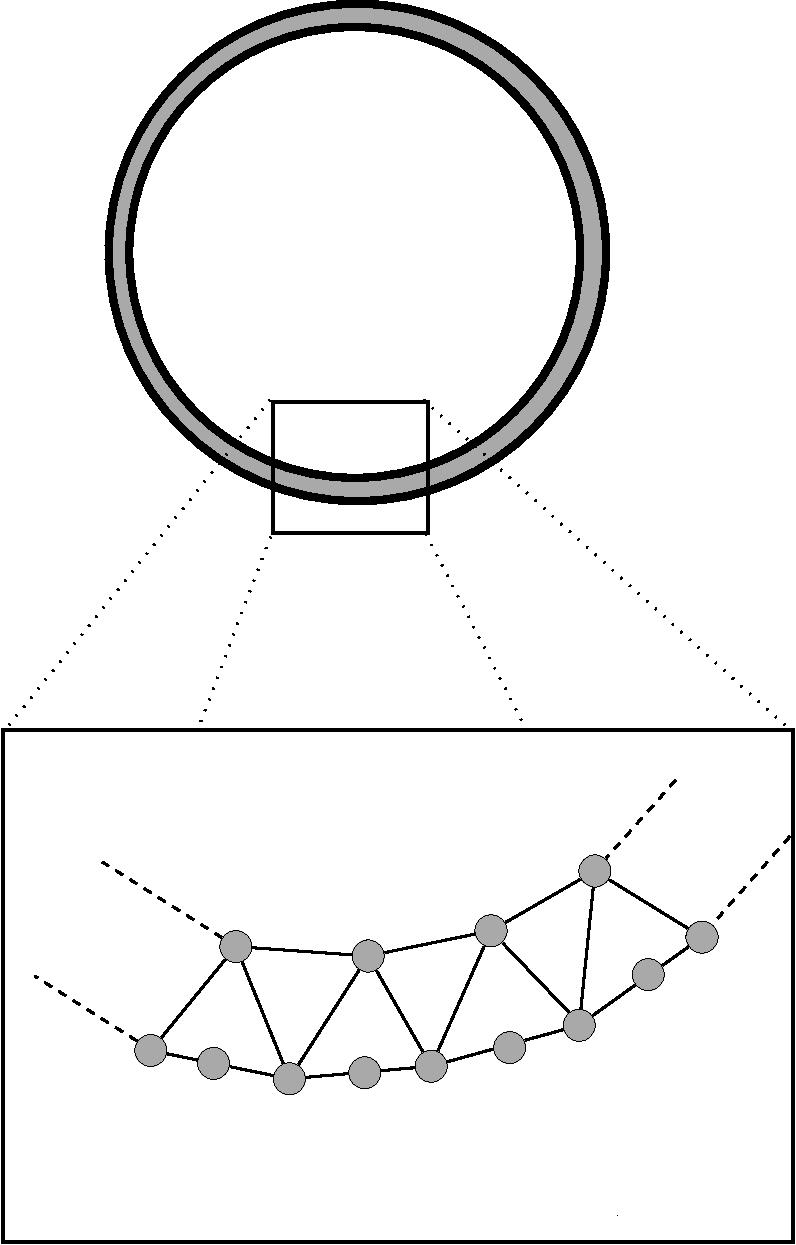

In [9]:
import networkx
import matplotlib.pyplot as plt
import numpy as np
import collections
import pandas as pd
%matplotlib notebook 

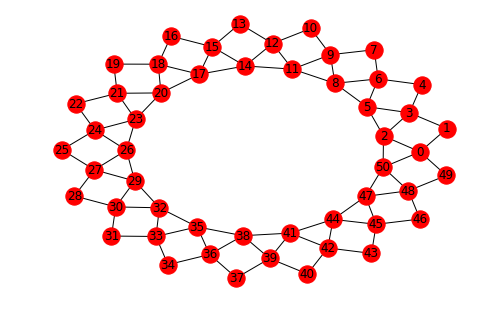

In [51]:
g = networkx.Graph()

g.add_edge(0, 1)
g.add_edge(1, 3)
g.add_edge(0, 2)
g.add_edge(2, 3)


n = 51
for j in range(1,int(n/3)):
    i = 3*j
    g.add_edge(i-1,(i+2)%n)
    g.add_edge(i, (i+1)%n)
    g.add_edge((i)%n, (i+2)%n)
    g.add_edge((i+1)%n, (i+3)%n)
    g.add_edge((i+2)%n, (i+3)%n)
    if (j == int(n/3)-1):
        g.add_edge((i+2)%n,(i+5)%3)




networkx.draw_kamada_kawai(g,with_labels = True)

# Problem 2

Implement the following rewiring algorithm:
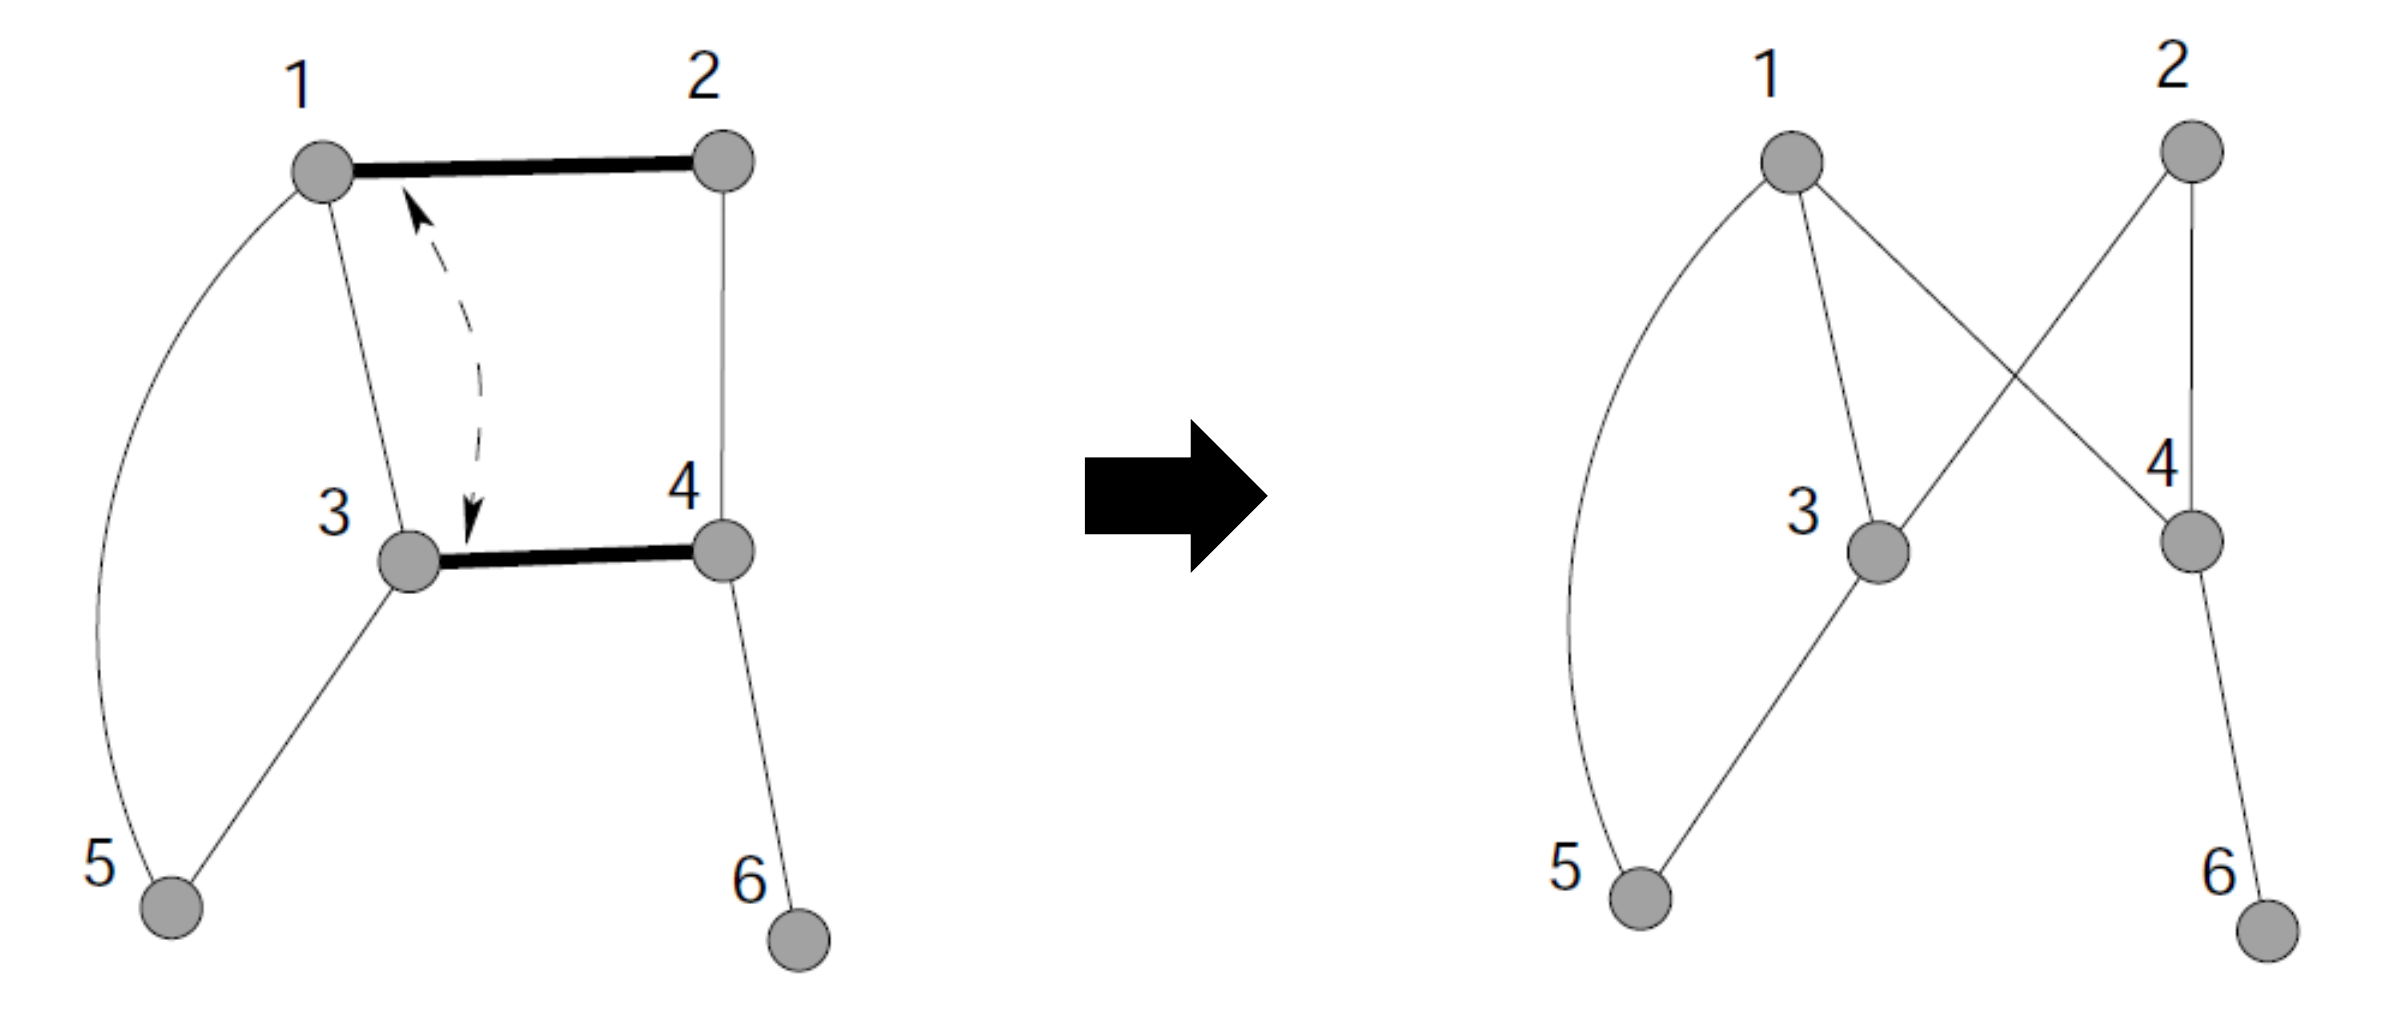

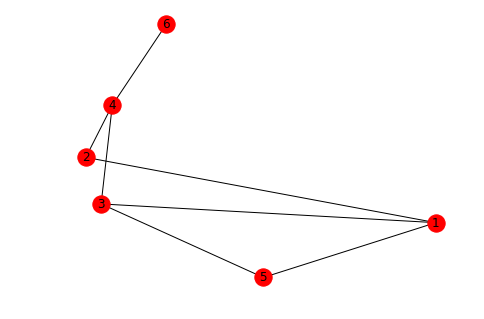

In [4]:
g = networkx.Graph()

g.add_edge(1, 2)
g.add_edge(1, 3)
g.add_edge(1, 5)
g.add_edge(5, 3)
g.add_edge(3, 4)
g.add_edge(4, 2)
g.add_edge(4, 6)

networkx.draw(g,with_labels = True)

In [5]:
def max_nodes(a):
    nods = []
    for node, value in a.items(): 
        if len(nods) < 2:
            nods.append(node)
        elif a[nods[0]]<value:
            if a[nods[1]] < a[nods[0]]:
                nods[1] = nods[0]
            nods[0] = node        
        elif a[nods[1]]<value:
            if a[nods[0]] < a[nods[1]]:
                nods[0] = nods[1]
            nods[1] = node
        elif a[nods[0]] == value and np.random.rand(1) < 0.5:
            nods[0] = node
        elif a[nods[1]] == value and np.random.rand(1) < 0.5:
            nods[1] = node
    return nods

In [6]:
def greater_betw(g):
    cen = networkx.networkx.edge_betweenness_centrality(g)
    nodes =  max_nodes(cen)
    return nodes

In [7]:
def change_edges(g):
    edges = greater_betw(g)
    g.remove_edge(edges[0][0],edges[0][1])
    g.remove_edge(edges[1][0],edges[1][1])
    g.add_edge(edges[0][0], edges[1][1])
    g.add_edge(edges[1][0],edges[0][1])
    return g

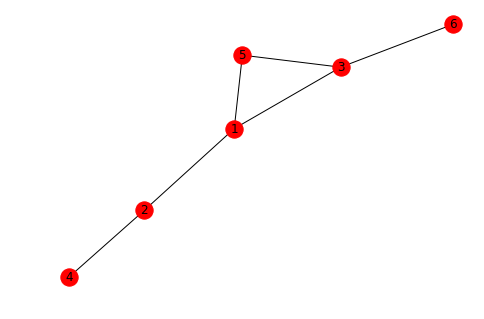

In [8]:
g = change_edges(g)
networkx.draw(g,with_labels = True)

# Problem 3

Create 3 networks with networkx: a clique of 4, 5 and 6 nodes! (Clique is a fully connected graph, where each node is connected to all other nodes.)

Select one node from each of the networks, and connect them with each other. In this way a small ring of three cliques emerges.

Rewire this network by connecting two unconnected nodes with the highest clustering coefficients, and remove one edge, that connects one of the node pairs with the smallest clustering coefficients! (The sum of the clustering coefficients of the ending nodes of the link should be minimal.)

Repeat this rewiring step several times, and track the changes of the degree distribution! Try to make a figure, which shows the change in the distribution and interpret the result! (Recall, what are the single valued descriptors of a distribution?)

In [10]:
def clique(g, startnode, nodes):
    for i in range(startnode,startnode + nodes):
        for j in range(i+1,startnode + nodes):
            g.add_edge(i,j)
    return g

In [19]:
g_test = networkx.Graph()
g_test = clique(g_test,0,4)
g_test.add_edge(3,4)
g_test = clique(g_test,4,5)
g_test.add_edge(8,9)
g_test = clique(g_test,9,6)
g_test.add_edge(14,0)

networkx.draw_networkx(g_test, with_labels = True)
# plt.draw()

In [12]:
def create_master(n, g):
    master = pd.DataFrame(columns = ["Origin", "Destination", "Clustering", "Edge"])
    cen = networkx.clustering(g)
    for i in range(0,n):
        for j in range(i+1,n):
            master = master.append({'Origin':i, 'Destination':j, 'Clustering':(cen[i] + cen[j]), 'Edge': g.has_edge(i,j)},ignore_index = True)

    return master

In [13]:
def iteration(g, master):
    edgemax = pd.DataFrame(master[master["Edge"] == False])
    edgemax = edgemax[edgemax["Clustering"] == np.max(edgemax["Clustering"])].sample()
    g.add_edge(edgemax.iloc[0,0], edgemax.iloc[0,1])
    
    edgemin = master[master["Edge"] == True]

    edgemin = edgemin[edgemin["Clustering"] == np.min(edgemin["Clustering"])].sample()
    g.remove_edge(edgemin.iloc[0,0], edgemin.iloc[0,1])
    return [g]

In [14]:
networkx.draw(g_test,with_labels = True)

<IPython.core.display.Javascript object>


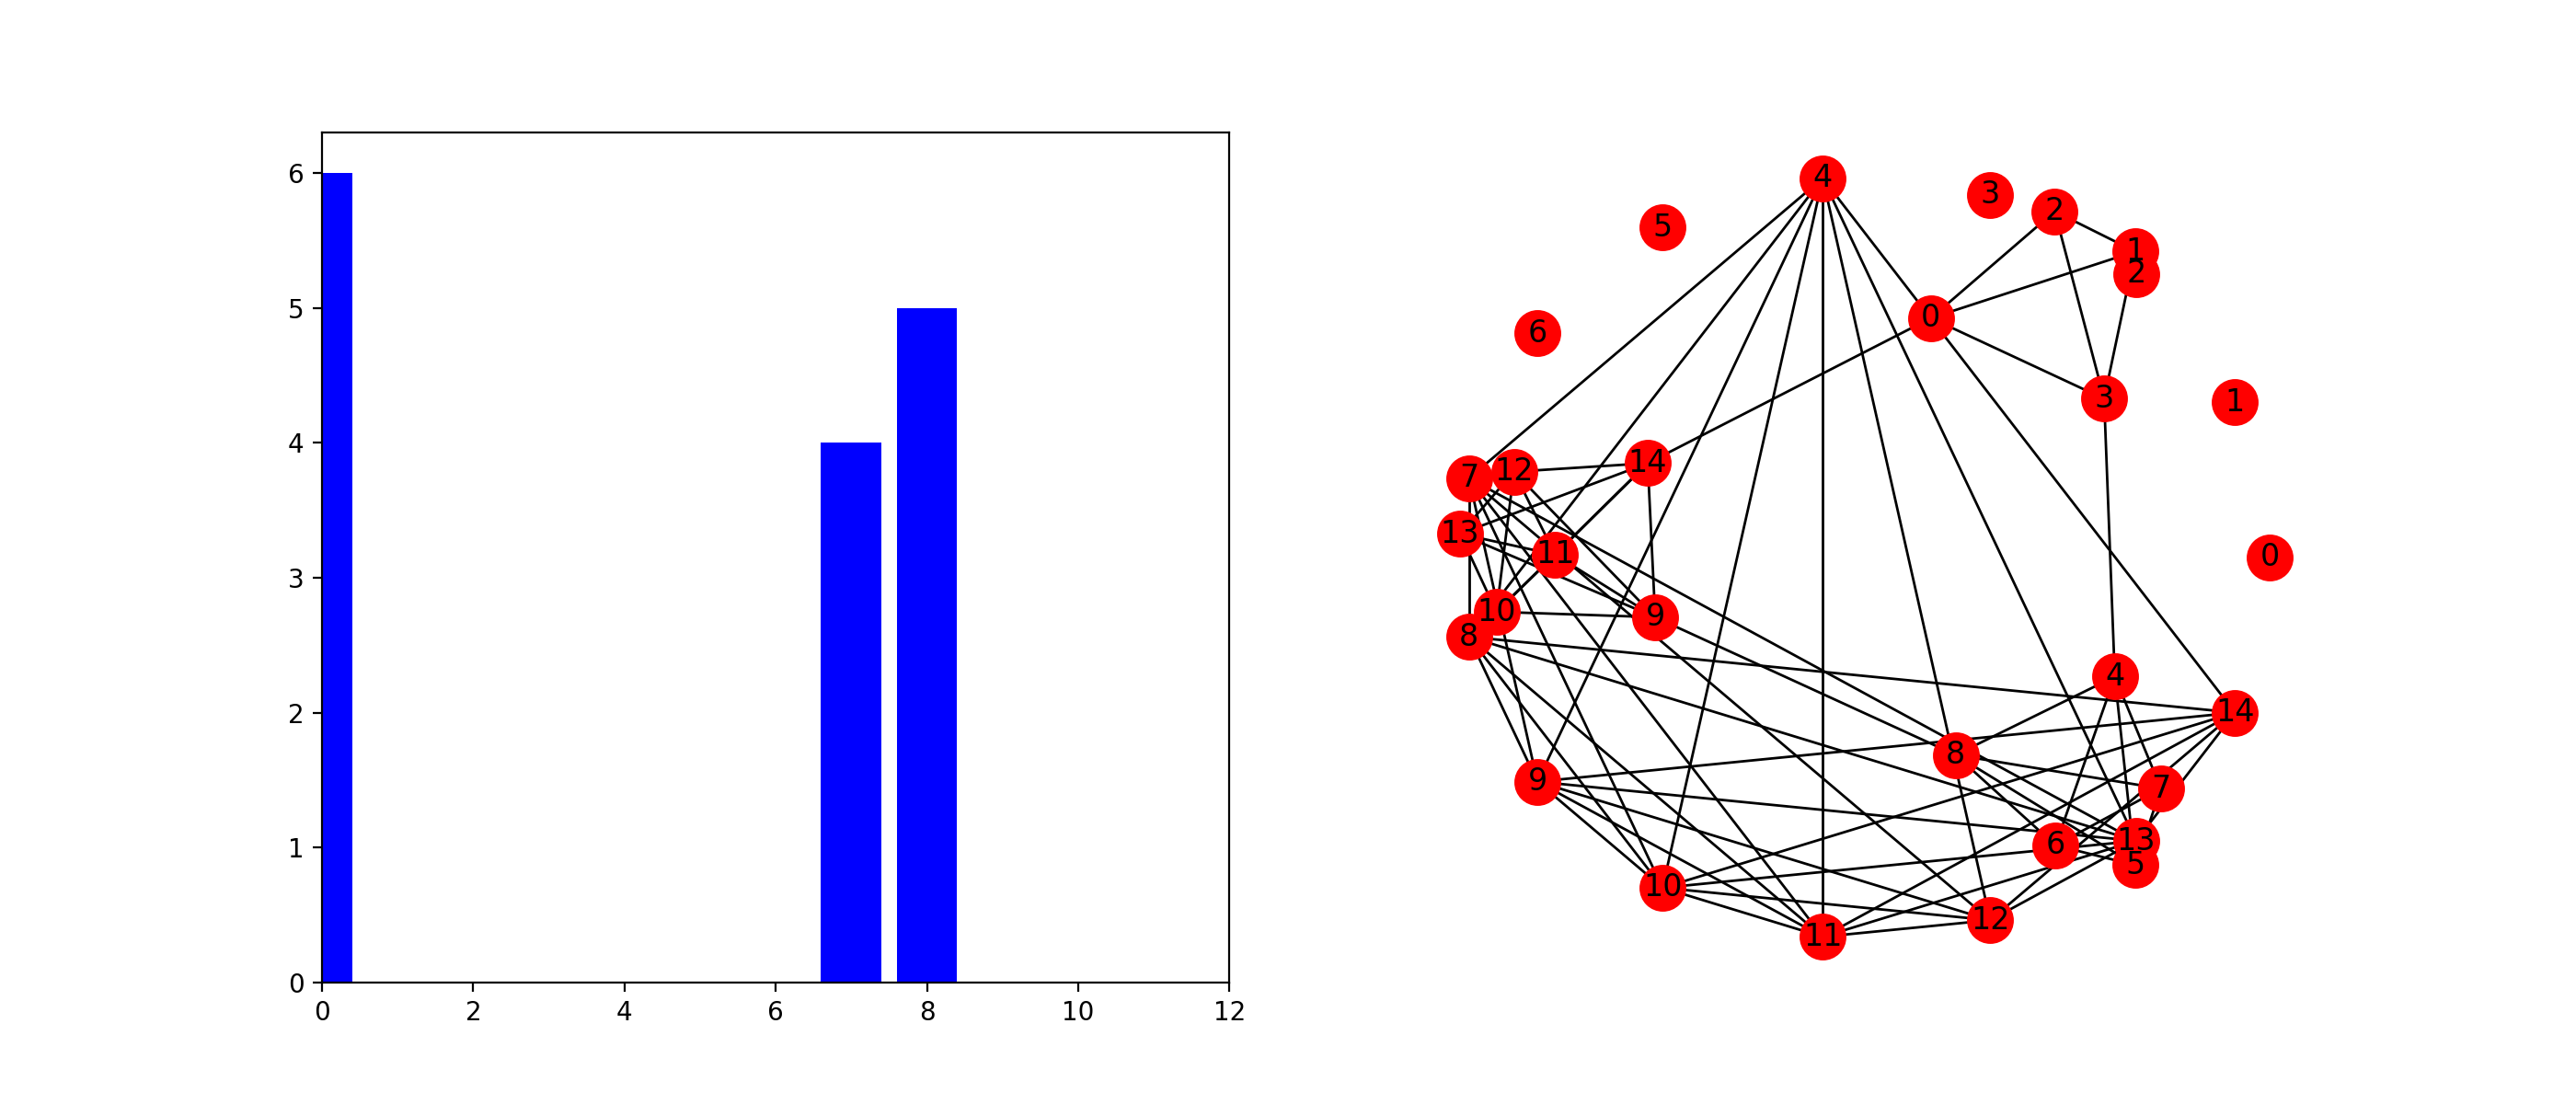

In [18]:
master1 = create_master(15, g_test)
g_loop = g_test

%matplotlib notebook
figure = plt.figure("Graph and histogram", figsize=(14,6))
ax1 = figure.add_subplot(121)
ax2 = figure.add_subplot(122)
plt.ion()

figure.canvas.draw()

for i in range(0,60):
    [g_loop] = iteration(g_loop, master1)
    master1 = create_master(15, g_loop)
    
    
    
    degree_sequence = sorted([d for n, d in g_loop.degree()], reverse=True)  
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    
    ax1.clear()
    ax1.bar(deg, cnt, width=0.80, color='b')
    ax1.set(xlim = (0,12))
    ax2.clear()
    networkx.draw_shell(g_loop,with_labels = True)
    figure.canvas.draw()